In [2]:
import pv_profil
import matplotlib.pyplot as plt
pv = pv_profil.get_pv_profil(40599, 2014, 10)

C:\Users\n-w\AppData\Local\Temp\ipykernel_1560\783148553.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_axis = pd.date_range(start="00:00", periods=24, freq="H")
C:\Users\n-w\AppData\Local\Temp\ipykernel_1560\783148553.py:29: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ax.set_xticks(pd.date_range("00:00", "23:00", freq="3H"))  # Ticks alle 3 Stunden


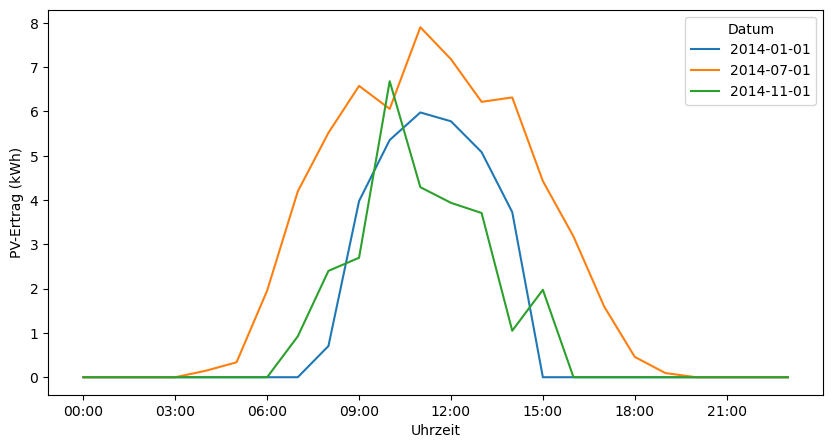

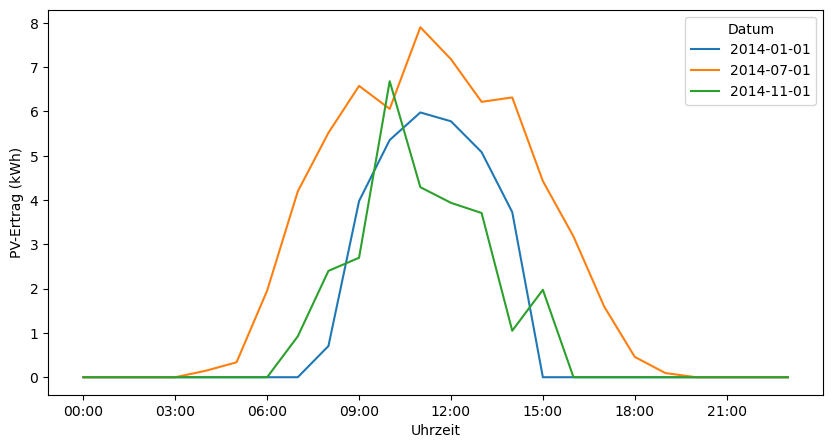

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

# Wähle drei spezifische Tage für den Vergleich
dates = ["2014-01-01", "2014-07-01", "2014-11-01"]  # Ein Tag aus Januar, Mai und August

# Plot erstellen
fig, ax = plt.subplots()

for date in dates:
    df_day = pv.loc[date]  # Daten für den spezifischen Tag auswählen
    df_day = df_day.copy()  # Sicherstellen, dass keine View verändert wird
    
    # Erstelle eine Zeitachse mit Stunden des Tages (00:00 - 23:00)
    time_axis = pd.date_range(start="00:00", periods=24, freq="H")

    ax.plot(time_axis, df_day.values, label=date)  # Plotten mit Zeitachse

# Achsentitel setzen
ax.set_xlabel("Uhrzeit")
ax.set_ylabel("PV-Ertrag (kWh)")
ax.legend(title="Datum")

# X-Achse als Uhrzeit formatieren
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))  # Zeigt Uhrzeit an
ax.set_xticks(pd.date_range("00:00", "23:00", freq="3H"))  # Ticks alle 3 Stunden

plt.show()


In [7]:
import lastprofile_VDI4655

df = lastprofile_VDI4655.get_lastprofile(27000,4000,1500,200,5,3)

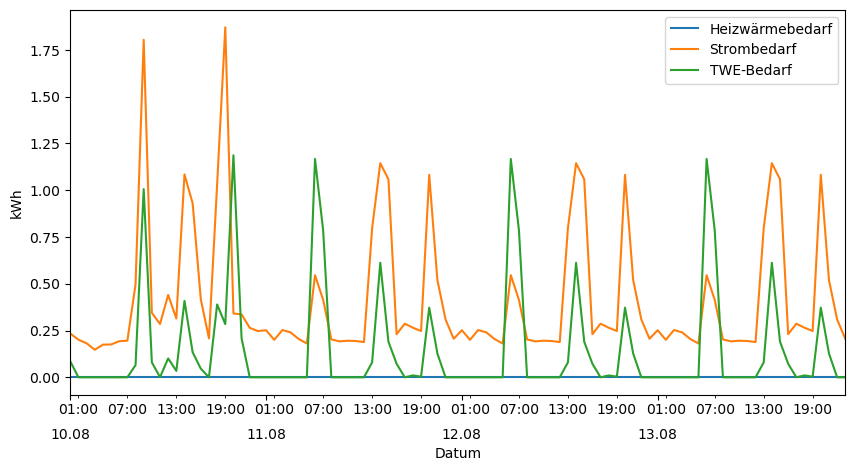

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

plt.rcParams["figure.figsize"] = [10, 5]

# Falls du nur einen bestimmten Zeitraum plotten willst, kannst du hier filtern:
start_date = "2014-08-10"
end_date = "2014-08-13"

df_filtered = df.loc[start_date:end_date]  # Dynamische Auswahl

# Daten plotten
plt.plot(df_filtered.index, df_filtered['Heizwärmebedarf'], label="Heizwärmebedarf")
plt.plot(df_filtered.index, df_filtered['Strombedarf'], label="Strombedarf")
plt.plot(df_filtered.index, df_filtered['Warmwasserbedarf'], label="TWE-Bedarf")

plt.xlabel('Datum', fontsize=10)
plt.ylabel('kWh', fontsize=10)
plt.legend(fontsize=10, loc='best')

# X-Achse anpassen
plt.xticks(fontsize=10)

# Datum-Format anpassen: Nur bei 00:00 Uhr das Datum, sonst nur die Uhrzeit
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.HourLocator(byhour=0))  # Haupt-Ticks nur um 00:00 Uhr
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))  # Format: Tag.Monat

ax.xaxis.set_minor_locator(mdates.HourLocator(interval=6))  # Alle 6h eine Nebenmarkierung
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))  # Uhrzeit anzeigen

# Abstand des Datums nach unten setzen
ax.xaxis.set_tick_params(labelsize=10, pad=20)  # Abstand vergrößern

# Automatische Anpassung der x-Achse basierend auf den Daten
ax.set_xlim([df_filtered.index.min(), df_filtered.index.max()])  # Dynamisch setzen

plt.show()

In [9]:
import berechnen_bs as bs

df_bs = bs.mit_pv(df.copy(), pv, 10, 10)

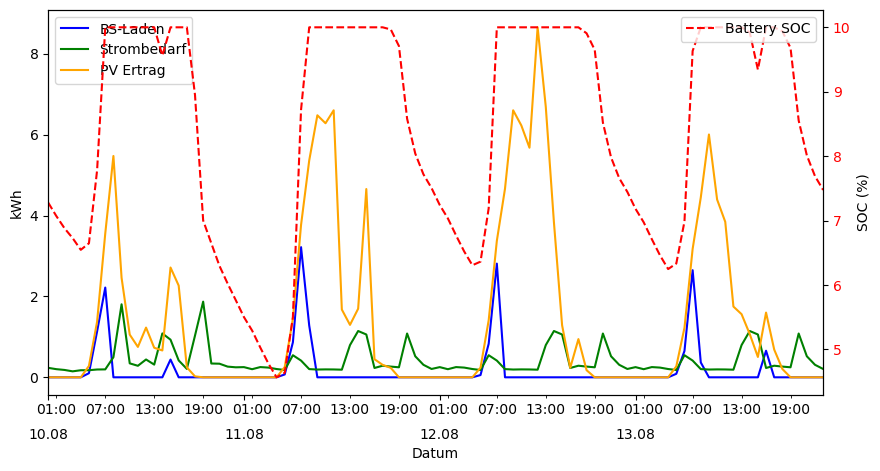

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams["figure.figsize"] = [10, 5]

# Falls du nur einen bestimmten Zeitraum plotten willst, kannst du hier filtern:
start_date = "2014-08-10"
end_date = "2014-08-13"

df_filtered = df_bs.loc[start_date:end_date]  # Dynamische Auswahl

# Haupt-Achse für Energie (kWh)
fig, ax1 = plt.subplots()
ax1.plot(df_filtered.index, df_filtered['battery_charge'], label="BS-Laden", color='b')
ax1.plot(df_filtered.index, df_filtered['Strombedarf'], label="Strombedarf", color='g')
ax1.plot(df_filtered.index, df_filtered['PV Ertrag'], label="PV Ertrag", color='orange')

ax1.set_xlabel('Datum', fontsize=10)
ax1.set_ylabel('kWh', fontsize=10)
ax1.legend(fontsize=10, loc='upper left')

# X-Achse anpassen
ax1.xaxis.set_major_locator(mdates.HourLocator(byhour=0))  # Haupt-Ticks nur um 00:00 Uhr
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))  # Format: Tag.Monat
ax1.xaxis.set_minor_locator(mdates.HourLocator(interval=6))  # Alle 6h eine Nebenmarkierung
ax1.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))  # Uhrzeit anzeigen
ax1.xaxis.set_tick_params(labelsize=10, pad=20)  # Abstand vergrößern
ax1.set_xlim([df_filtered.index.min(), df_filtered.index.max()])  # Dynamisch setzen

# Zweite y-Achse für Battery SOC (%)
ax2 = ax1.twinx()
ax2.plot(df_filtered.index, df_filtered['battery_soc'], label="Battery SOC", color='r', linestyle="dashed")
ax2.set_ylabel('SOC (%)', fontsize=10)
ax2.tick_params(axis='y', labelcolor=)
ax2.legend(fontsize=10, loc='upper right')

plt.show()
